# Transformers

In [1]:
import os
import sys

os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/group/pmc026/nchoong/QuantumTransformer'

In [2]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.plots import plot_metrics
from transformer.pytorch.utils.load_dataloader import load_dataloader

2024-10-12 12:46:57.077492: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-12 12:46:57.090959: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-12 12:46:57.106643: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-12 12:46:57.111381: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-12 12:46:57.123527: I tensorflow/core/platform/cpu_feature_guar

In [3]:
from config import dev

dev

device(type='cuda')

In [4]:
import random
import numpy as np
import torch
import tensorflow as tf

In [5]:
[torch.cuda.device(i) for i in range(torch.cuda.device_count())]

[<torch.cuda.device at 0x7f5fd1bfce50>, <torch.cuda.device at 0x7f5fd1236290>]

In [6]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [7]:
train_dataloader, val_dataloader, test_dataloader = load_dataloader("imdb")

Loading train tensors: 100%|██████████| 7/7 [00:19<00:00,  2.84s/it]


Sample size:  5000


Loading test tensors: 100%|██████████| 9/9 [00:24<00:00,  2.73s/it]


Test size:  5000
Sampled train tensor shape:  torch.Size([20000, 128, 768])
Sampled val tensor shape:  torch.Size([5000, 128, 768])
Sampled test tensor shape:  torch.Size([5000, 128, 768])
Train, Val, Test size:  20000 5000 5000
pos:  10006
neg:  9994
pos:  2494
neg:  2506
pos:  2515
neg:  2485


## Classical

```
++ There will be 2 transformer blocks
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=256, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (linears): ModuleList(
          (0-2): 3 x Linear(in_features=256, out_features=256, bias=False)
        )
        (combine_heads): Linear(in_features=256, out_features=256, bias=False)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (ffn): FeedForward(
        (linear_1): Linear(in_features=256, out_features=16, bias=True)
        (linear_2): Linear(in_features=16, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (dropout2): Dropout(p=0.1, inplace=False)
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (class_logits): Linear(in_features=256, out_features=1, bias=True)
)
Layer Name                               Number of Parameters
============================================================
squeeze.weight                           196608
squeeze.bias                             256
transformers.0.attn.linears.0.weight     65536
transformers.0.attn.linears.1.weight     65536
transformers.0.attn.linears.2.weight     65536
transformers.0.attn.combine_heads.weight 65536
transformers.0.norm1.weight              256
transformers.0.norm1.bias                256
transformers.0.ffn.linear_1.weight       4096
transformers.0.ffn.linear_1.bias         16
transformers.0.ffn.linear_2.weight       4096
transformers.0.ffn.linear_2.bias         256
transformers.0.norm2.weight              256
transformers.0.norm2.bias                256
transformers.1.attn.linears.0.weight     65536
transformers.1.attn.linears.1.weight     65536
transformers.1.attn.linears.2.weight     65536
transformers.1.attn.combine_heads.weight 65536
transformers.1.norm1.weight              256
transformers.1.norm1.bias                256
transformers.1.ffn.linear_1.weight       4096
transformers.1.ffn.linear_1.bias         16
transformers.1.ffn.linear_2.weight       4096
transformers.1.ffn.linear_2.bias         256
transformers.1.norm2.weight              256
transformers.1.norm2.bias                256
layer_norm.weight                        256
layer_norm.bias                          256
class_logits.weight                      256
class_logits.bias                        1
The model has 740,897 trainable parameters
Epoch   1/20: 100%|██████████| 313/313 [00:13<00:00, 22.87batch/s, Epoch = 0m 13s, Loss = 0.6601|0.6208, Acc = 0.616|0.724, AUC = 66.469|79.649]
Epoch   2/20: 100%|██████████| 313/313 [00:13<00:00, 23.83batch/s, Epoch = 0m 13s, Loss = 0.5518|0.5038, Acc = 0.752|0.784, AUC = 82.623|86.458]
Epoch   3/20: 100%|██████████| 313/313 [00:10<00:00, 29.73batch/s, Epoch = 0m 10s, Loss = 0.4546|0.4365, Acc = 0.795|0.804, AUC = 87.450|88.620]
Epoch   4/20: 100%|██████████| 313/313 [00:09<00:00, 32.95batch/s, Epoch = 0m 9s, Loss = 0.4178|0.4307, Acc = 0.812|0.800, AUC = 89.112|89.696]
Epoch   5/20: 100%|██████████| 313/313 [00:08<00:00, 36.32batch/s, Epoch = 0m 8s, Loss = 0.4013|0.3945, Acc = 0.821|0.823, AUC = 89.978|90.376]
Epoch   6/20: 100%|██████████| 313/313 [00:08<00:00, 36.78batch/s, Epoch = 0m 8s, Loss = 0.3877|0.3959, Acc = 0.830|0.816, AUC = 90.660|90.434]
Epoch   7/20: 100%|██████████| 313/313 [00:09<00:00, 31.55batch/s, Epoch = 0m 9s, Loss = 0.3858|0.3922, Acc = 0.829|0.825, AUC = 90.761|90.493]
Epoch   8/20: 100%|██████████| 313/313 [00:09<00:00, 32.14batch/s, Epoch = 0m 9s, Loss = 0.3839|0.3909, Acc = 0.831|0.824, AUC = 90.843|90.549]
Epoch   9/20: 100%|██████████| 313/313 [00:09<00:00, 33.74batch/s, Epoch = 0m 9s, Loss = 0.3838|0.3925, Acc = 0.830|0.817, AUC = 90.862|90.605]
Epoch  10/20: 100%|██████████| 313/313 [00:08<00:00, 36.69batch/s, Epoch = 0m 8s, Loss = 0.3820|0.3902, Acc = 0.831|0.825, AUC = 90.943|90.657]
Epoch  11/20: 100%|██████████| 313/313 [00:08<00:00, 37.20batch/s, Epoch = 0m 8s, Loss = 0.3815|0.3890, Acc = 0.832|0.824, AUC = 90.973|90.662]
Epoch  12/20: 100%|██████████| 313/313 [00:08<00:00, 38.41batch/s, Epoch = 0m 8s, Loss = 0.3811|0.3898, Acc = 0.832|0.822, AUC = 91.004|90.668]
Epoch  13/20: 100%|██████████| 313/313 [00:09<00:00, 33.21batch/s, Epoch = 0m 9s, Loss = 0.3815|0.3865, Acc = 0.832|0.825, AUC = 90.967|90.673]
Epoch  14/20: 100%|██████████| 313/313 [00:06<00:00, 46.75batch/s, Epoch = 0m 6s, Loss = 0.3806|0.3908, Acc = 0.831|0.822, AUC = 91.007|90.679]
Epoch  15/20: 100%|██████████| 313/313 [00:06<00:00, 45.75batch/s, Epoch = 0m 6s, Loss = 0.3804|0.3877, Acc = 0.832|0.826, AUC = 91.036|90.684]
Epoch  16/20: 100%|██████████| 313/313 [00:08<00:00, 38.26batch/s, Epoch = 0m 8s, Loss = 0.3809|0.3913, Acc = 0.833|0.823, AUC = 91.003|90.684]
Epoch  17/20: 100%|██████████| 313/313 [00:07<00:00, 39.35batch/s, Epoch = 0m 7s, Loss = 0.3813|0.3862, Acc = 0.832|0.826, AUC = 90.990|90.685]
Epoch  18/20: 100%|██████████| 313/313 [00:07<00:00, 40.70batch/s, Epoch = 0m 7s, Loss = 0.3804|0.3918, Acc = 0.834|0.823, AUC = 91.040|90.686]
Epoch  19/20: 100%|██████████| 313/313 [00:06<00:00, 49.89batch/s, Epoch = 0m 6s, Loss = 0.3810|0.3867, Acc = 0.832|0.825, AUC = 91.010|90.686]
Epoch  20/20: 100%|██████████| 313/313 [00:07<00:00, 41.85batch/s, Epoch = 0m 7s, Loss = 0.3801|0.3895, Acc = 0.834|0.823, AUC = 91.035|90.687]
TOTAL TIME = 179.21s
BEST ACC = 0.83% AT EPOCH 15
BEST AUC = 90.69 AT EPOCH 20
```

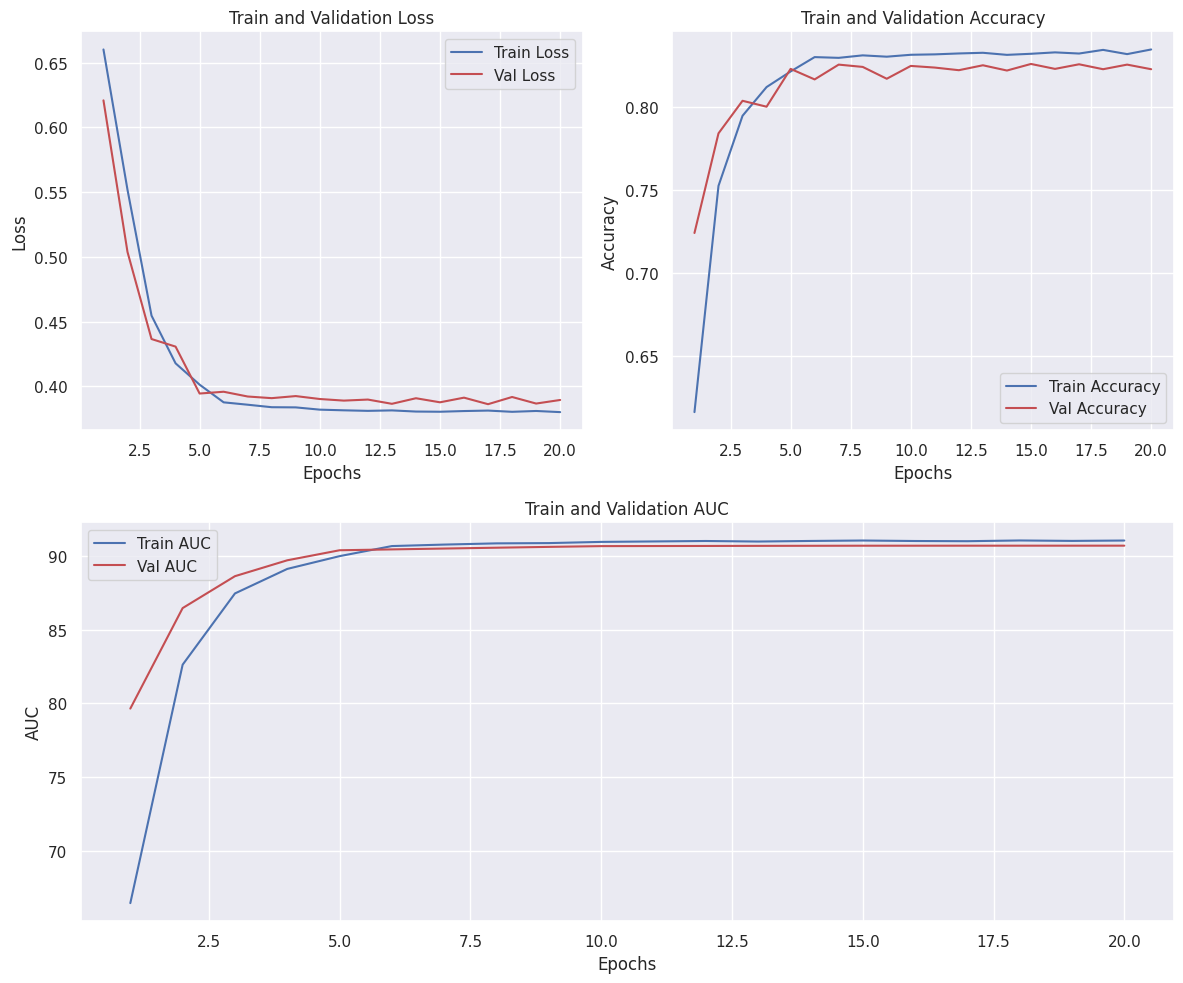


In [8]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    dropout_rate=0.05,
    lr=1e-5,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=2**8,
    num_heads=2,
    num_blocks=2,
    tqdm_disabled=False,
    pooling_method="MEAN",
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=256, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (linears): ModuleList(
          (0-2): 3 x Linear(in_features=256, out_features=256, bias=False)
        )
        (combine_heads): Linear(in_features=256, out_features=256, bias=False)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (ffn): FeedForward(
        (linear_1): Linear(in_features=256, out_features=16, bias=True)
        (linear_2): Linear(in_features=16, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (dropout2): Dropout(p=0.1, inplace=False)
    )
  )
  (dropout): Dropout(p=0.05, inplace=False)
  (layer_norm): LayerNo

Epoch  20/20: 100%|██████████| 313/313 [00:16<00:00, 19.25batch/s, Epoch = 0m 16s, Loss = 36.7469|38.2086, Acc = 83.906|83.228, AUC = 91.647|91.385]

TOTAL TIME = 208.30s
BEST ACC = 83.50% AT EPOCH 17
BEST AUC = 91.38% AT EPOCH 20


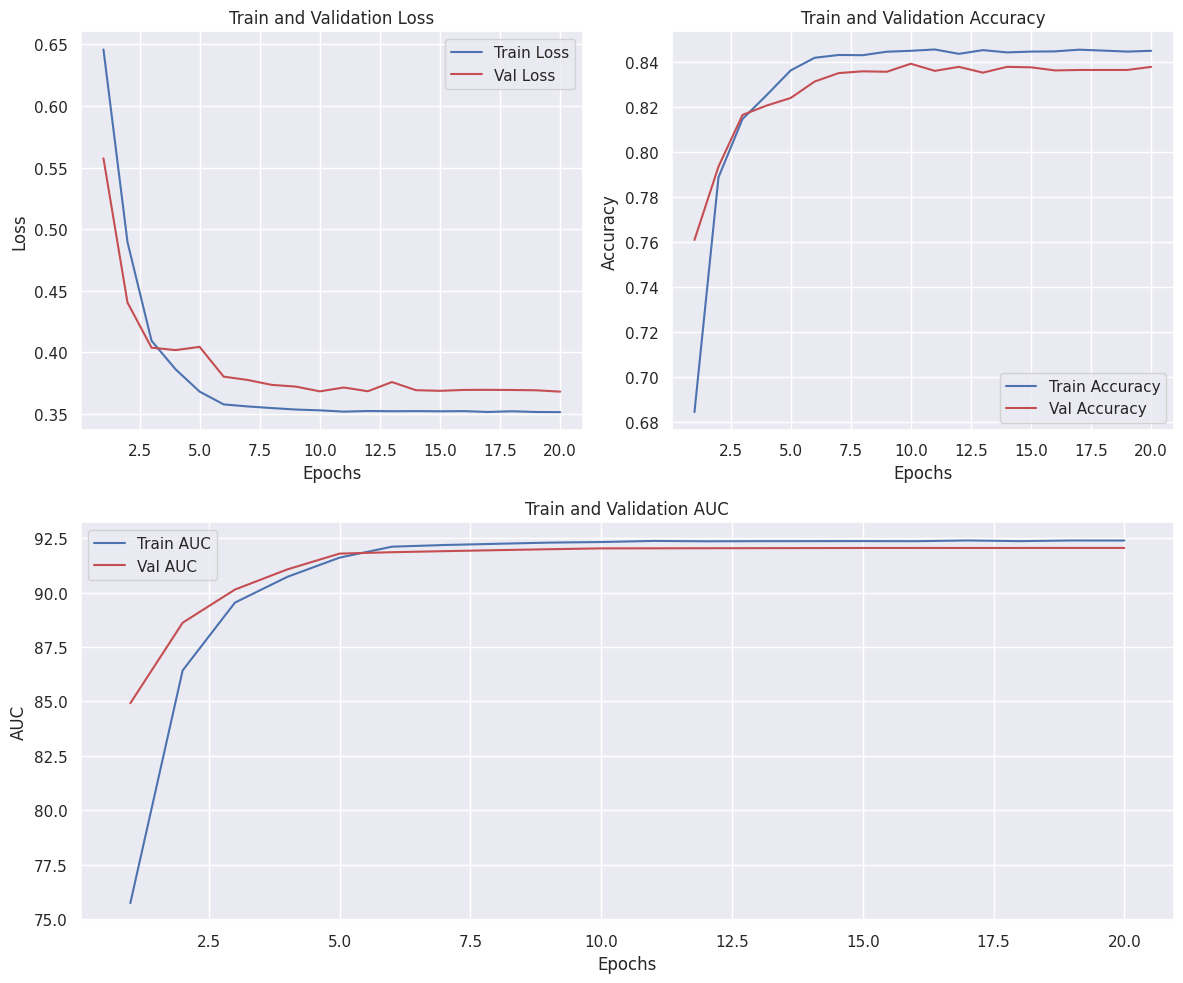

In [16]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

## Quantum with Pennylane GPU

In [ ]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    dropout_rate=0.05,
    lr=1e-5,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=2**8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    pooling_method="MEAN",
    q_device="default.qubit",
    batch=True,
    circuit_type="pennylane",
    encoding_type="angle_amp",
    pennylane_args={
        "hadamard": False,
        "encoder": "amplitude",
        "angle_rot": "X",
        "entangler": "basic",
        "rot": "Z",
        "imprimitive": "X",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=256, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (k_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (q_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (v_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (combine_heads): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (dropout): Dropout(p=0.1, inplace=False)
        (unsqueeze1): Linear(in_features=4, out_features=128, bias=True)
        (unsqueeze2): Linear(in_features

Epoch   1/20:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch   1/20: 100%|██████████| 313/313 [04:47<00:00,  1.23batch/s]/home/nchoong/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nchoong/.local/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Epoch   2/20: 100%|██████████| 313/313 [04:47<00:00,  1.24batch/s]/home/nchoong/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nchoong/.local/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Epoch   3/20: 100%|██████████| 313/313 [04:56<00:00,  1.22batch/s]/home/nchoong/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty sl

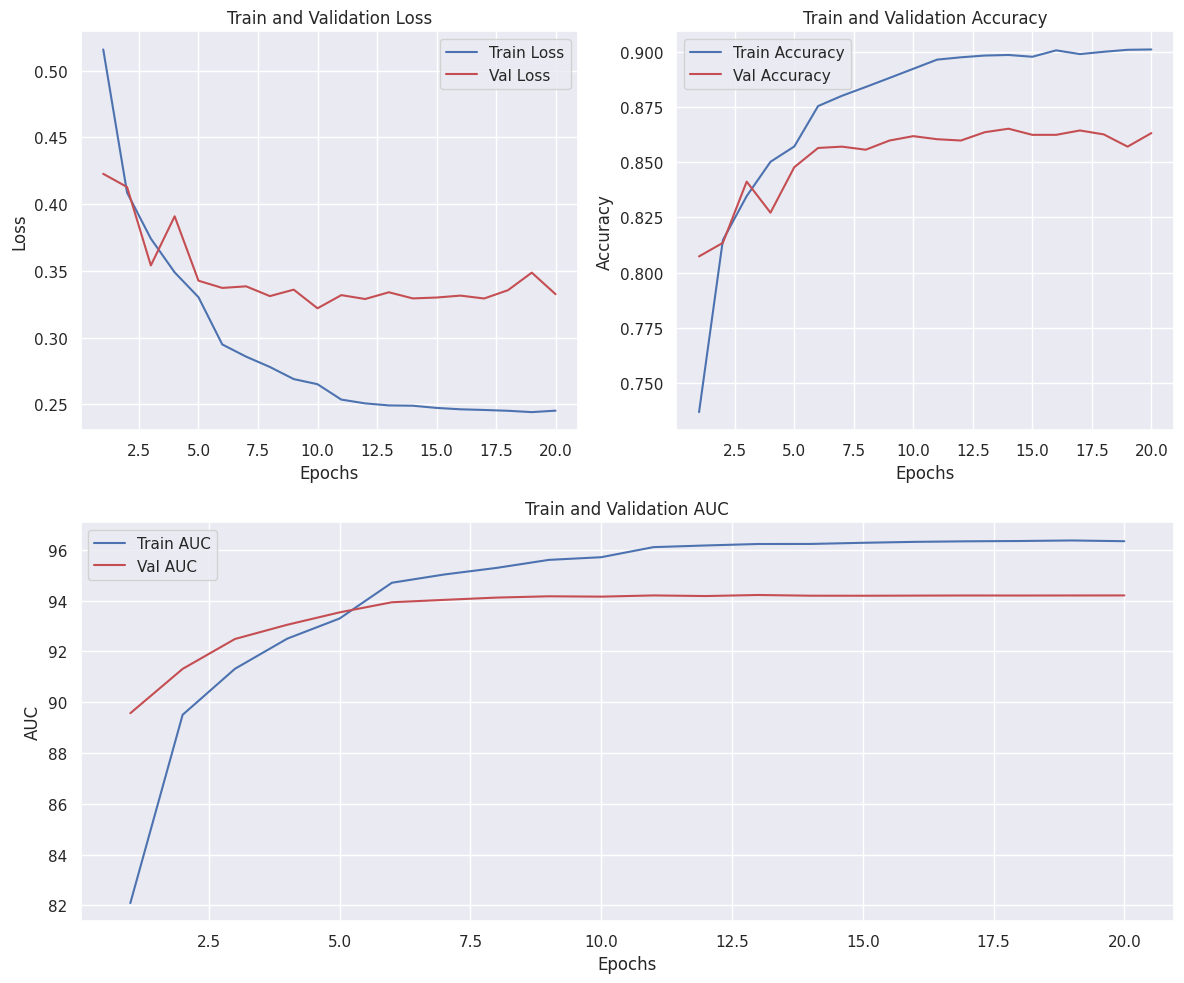

In [9]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

```markdown
++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=256, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (k_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (q_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (v_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (combine_heads): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (dropout): Dropout(p=0.1, inplace=False)
        (unsqueeze1): Linear(in_features=4, out_features=128, bias=True)
        (unsqueeze2): Linear(in_features=8, out_features=256, bias=True)
      )
      (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (ffn): FeedForward(
        (linear_2): Linear(in_features=8, out_features=256, bias=True)
        (vqc): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (gelu): GELU(approximate='none')
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (dropout2): Dropout(p=0.1, inplace=False)
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (class_logits): Linear(in_features=256, out_features=1, bias=True)
)
Layer Name                               Number of Parameters
============================================================
squeeze.weight                           196608
squeeze.bias                             256
transformers.0.attn.k_linear.linear.weights 24
transformers.0.attn.q_linear.linear.weights 24
transformers.0.attn.v_linear.linear.weights 24
transformers.0.attn.combine_heads.linear.weights 24
transformers.0.attn.unsqueeze1.weight    512
transformers.0.attn.unsqueeze1.bias      128
transformers.0.attn.unsqueeze2.weight    2048
transformers.0.attn.unsqueeze2.bias      256
transformers.0.norm1.weight              256
transformers.0.norm1.bias                256
transformers.0.ffn.linear_2.weight       2048
transformers.0.ffn.linear_2.bias         256
transformers.0.ffn.vqc.linear.weights    24
transformers.0.norm2.weight              256
transformers.0.norm2.bias                256
transformers.1.attn.k_linear.linear.weights 24
transformers.1.attn.q_linear.linear.weights 24
transformers.1.attn.v_linear.linear.weights 24
transformers.1.attn.combine_heads.linear.weights 24
transformers.1.attn.unsqueeze1.weight    512
transformers.1.attn.unsqueeze1.bias      128
transformers.1.attn.unsqueeze2.weight    2048
transformers.1.attn.unsqueeze2.bias      256
transformers.1.norm1.weight              256
transformers.1.norm1.bias                256
transformers.1.ffn.linear_2.weight       2048
transformers.1.ffn.linear_2.bias         256
transformers.1.ffn.vqc.linear.weights    24
transformers.1.norm2.weight              256
transformers.1.norm2.bias                256
layer_norm.weight                        256
layer_norm.bias                          256
class_logits.weight                      256
class_logits.bias                        1
The model has 210,417 trainable parameters
Epoch   1/20:   0%|          | 0/313 [00:00<?, ?batch/s]Epoch   1/20: 100%|██████████| 313/313 [05:11<00:00,  1.01batch/s, Epoch = 5m 11s, Loss = 0.5160|0.4228, Acc = 0.737|0.807, AUC = 82.091|89.567]
Epoch   2/20: 100%|██████████| 313/313 [05:04<00:00,  1.03batch/s, Epoch = 5m 4s, Loss = 0.4088|0.4129, Acc = 0.815|0.813, AUC = 89.505|91.312]
Epoch   3/20: 100%|██████████| 313/313 [05:10<00:00,  1.01batch/s, Epoch = 5m 10s, Loss = 0.3742|0.3541, Acc = 0.835|0.841, AUC = 91.316|92.489]
Epoch   4/20: 100%|██████████| 313/313 [05:03<00:00,  1.03batch/s, Epoch = 5m 3s, Loss = 0.3490|0.3910, Acc = 0.850|0.827, AUC = 92.503|93.049]
Epoch   5/20: 100%|██████████| 313/313 [05:17<00:00,  1.02s/batch, Epoch = 5m 17s, Loss = 0.3304|0.3427, Acc = 0.857|0.848, AUC = 93.295|93.537]
Epoch   6/20: 100%|██████████| 313/313 [05:03<00:00,  1.03batch/s, Epoch = 5m 3s, Loss = 0.2949|0.3373, Acc = 0.875|0.856, AUC = 94.703|93.936]
Epoch   7/20: 100%|██████████| 313/313 [05:02<00:00,  1.03batch/s, Epoch = 5m 2s, Loss = 0.2858|0.3385, Acc = 0.880|0.857, AUC = 95.028|94.029]
Epoch   8/20: 100%|██████████| 313/313 [05:09<00:00,  1.01batch/s, Epoch = 5m 9s, Loss = 0.2781|0.3312, Acc = 0.884|0.856, AUC = 95.287|94.119]
Epoch   9/20: 100%|██████████| 313/313 [05:08<00:00,  1.02batch/s, Epoch = 5m 8s, Loss = 0.2690|0.3360, Acc = 0.888|0.860, AUC = 95.603|94.170]
Epoch  10/20: 100%|██████████| 313/313 [05:02<00:00,  1.03batch/s, Epoch = 5m 2s, Loss = 0.2652|0.3220, Acc = 0.892|0.862, AUC = 95.708|94.156]
Epoch  11/20: 100%|██████████| 313/313 [05:10<00:00,  1.01batch/s, Epoch = 5m 10s, Loss = 0.2536|0.3319, Acc = 0.896|0.860, AUC = 96.105|94.204]
Epoch  12/20: 100%|██████████| 313/313 [05:04<00:00,  1.03batch/s, Epoch = 5m 3s, Loss = 0.2508|0.3290, Acc = 0.897|0.860, AUC = 96.171|94.180]
Epoch  13/20: 100%|██████████| 313/313 [05:02<00:00,  1.04batch/s, Epoch = 5m 2s, Loss = 0.2493|0.3340, Acc = 0.898|0.864, AUC = 96.229|94.221]
Epoch  14/20: 100%|██████████| 313/313 [05:04<00:00,  1.03batch/s, Epoch = 5m 4s, Loss = 0.2490|0.3294, Acc = 0.898|0.865, AUC = 96.230|94.193]
Epoch  15/20: 100%|██████████| 313/313 [05:09<00:00,  1.01batch/s, Epoch = 5m 9s, Loss = 0.2474|0.3301, Acc = 0.898|0.862, AUC = 96.276|94.192]
Epoch  16/20: 100%|██████████| 313/313 [05:15<00:00,  1.01s/batch, Epoch = 5m 15s, Loss = 0.2464|0.3315, Acc = 0.901|0.862, AUC = 96.313|94.197]
Epoch  17/20: 100%|██████████| 313/313 [05:16<00:00,  1.01s/batch, Epoch = 5m 16s, Loss = 0.2459|0.3294, Acc = 0.899|0.864, AUC = 96.335|94.202]
Epoch  18/20: 100%|██████████| 313/313 [05:09<00:00,  1.01batch/s, Epoch = 5m 9s, Loss = 0.2452|0.3356, Acc = 0.900|0.863, AUC = 96.346|94.200]
Epoch  19/20: 100%|██████████| 313/313 [05:01<00:00,  1.04batch/s, Epoch = 5m 1s, Loss = 0.2442|0.3488, Acc = 0.901|0.857, AUC = 96.368|94.202]
Epoch  20/20: 100%|██████████| 313/313 [05:05<00:00,  1.03batch/s, Epoch = 5m 5s, Loss = 0.2453|0.3326, Acc = 0.901|0.863, AUC = 96.338|94.204]TOTAL TIME = 6153.93s
BEST ACC = 0.87% AT EPOCH 14
BEST AUC = 94.22 AT EPOCH 13
```


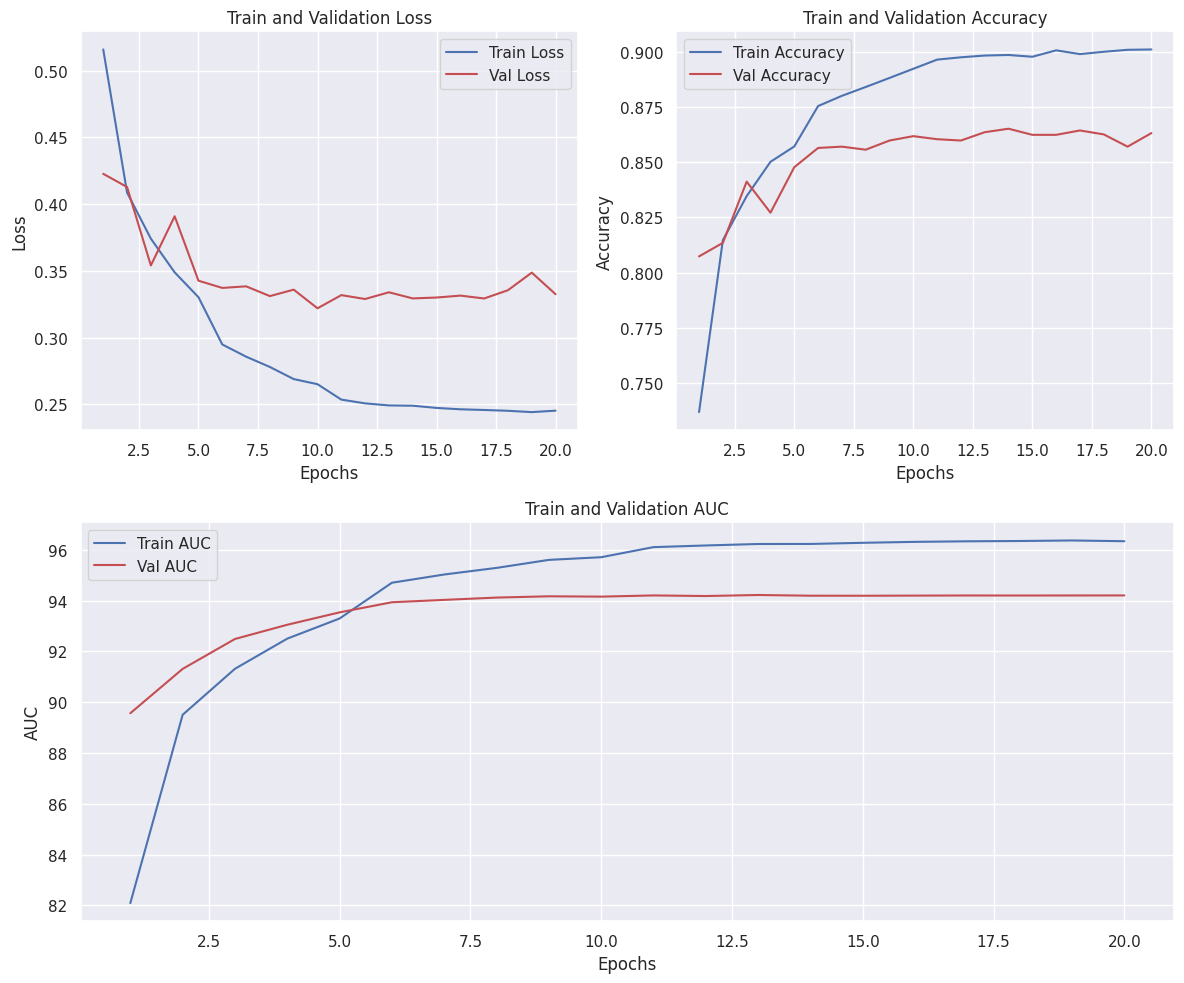

In [12]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit",
    batch=True,
    circuit_type="pennylane",
    encoding_type="angle_amp",
    pennylane_args={
        "hadamard": False,
        "encoder": "angle",
        "angle_rot": "Z",
        "entangler": "strong",
        "rot": "Z",
        "imprimitive": "Z",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=8, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (k_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (q_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (v_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (combine_heads): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace

Epoch   1/20:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch   9/20:  74%|███████▍  | 233/313 [04:42<01:36,  1.21s/batch]


KeyboardInterrupt: 

In [ ]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)